# Proyek Analisis Data: [Bike Sharing Dataset ]
- **Nama:** [Mohamad Risqi Aditiya]
- **Email:** [mohamadrisqi247@gmail.com]
- **ID Dicoding:** [mohamadrisqi]

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh faktor cuaca dan waktu terhadap jumlah penyewaan sepeda berdasarkan data jam?
- Bagaimana distribusi penyewaan sepeda berdasarkan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [8]:
hour_data = pd.read_csv('data/hour.csv')
hour_data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [9]:
day_data = pd.read_csv('data/day.csv')
day_data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


### Assessing Data

In [11]:
hour_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [12]:
hour_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [13]:
hour_data.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In [14]:
print("Jumlah duplikasi: ", hour_data.duplicated().sum())

Jumlah duplikasi:  0


In [15]:
day_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [16]:
day_data.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [17]:
day_data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [18]:
print("Jumlah duplikasi: ", day_data.duplicated().sum())

Jumlah duplikasi:  0


**Insight:**
- Dataset hour.csv berhasil dimuat dengan 17 baris dan 17.380 kolom. Dataset ini berisi data peminjaman sepeda yang dikumpulkan secara per jam, memberikan detail seperti cuaca, suhu, dan jumlah pengguna sepeda baik terdaftar maupun tidak.
- Dataset day.csv berhasil dimuat dengan 16 baris dan 732 kolom. Dataset ini mencakup data yang sama dengan hour.csv, namun dikumpulkan secara per hari, mempermudah analisis tren harian dan perbandingan data agregat.
- Kedua dataset ini memberikan informasi yang komprehensif tentang pola penggunaan sepeda di berbagai kondisi cuaca, waktu, dan hari, yang sangat bermanfaat untuk memahami faktor-faktor yang mempengaruhi peminjaman sepeda.
- Penggunaan dua dataset (hour dan day) memungkinkan kita untuk melakukan analisis lebih mendalam pola penggunaan sepeda per jam, yang akan memberikan pandangan holistik tentang perilaku peminjaman sepeda.

### Cleaning Data

In [21]:
hour_data.dropna(inplace=True)
day_data.dropna(inplace=True)

**Insight:**
- Dataset kini dalam kondisi bersih dan siap digunakan untuk berbagai analisis mendalam, termasuk eksplorasi pola penggunaan sepeda berdasarkan hari, jam, dan kondisi cuaca.

## Exploratory Data Analysis (EDA)

### Explore Data

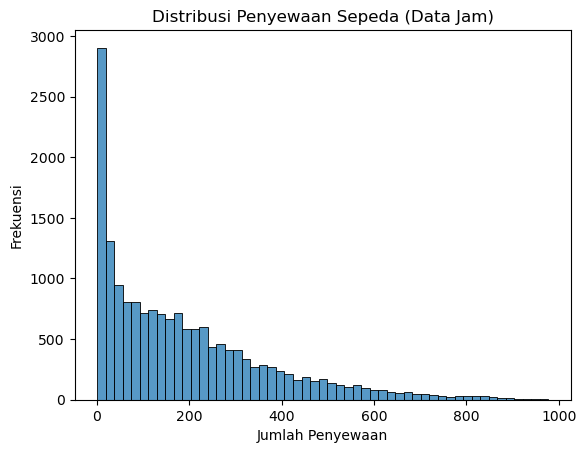

In [25]:
sns.histplot(hour_data['cnt'])
plt.title('Distribusi Penyewaan Sepeda (Data Jam)')
plt.xlabel('Jumlah Penyewaan')
plt.ylabel('Frekuensi')
plt.show()

**Insight:**
- Distribusi penyewaan sepeda menunjukkan pola yang jelas dengan puncak di waktu tertentu.

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana pengaruh faktor cuaca dan waktu terhadap jumlah penyewaan sepeda berdasarkan data jam?

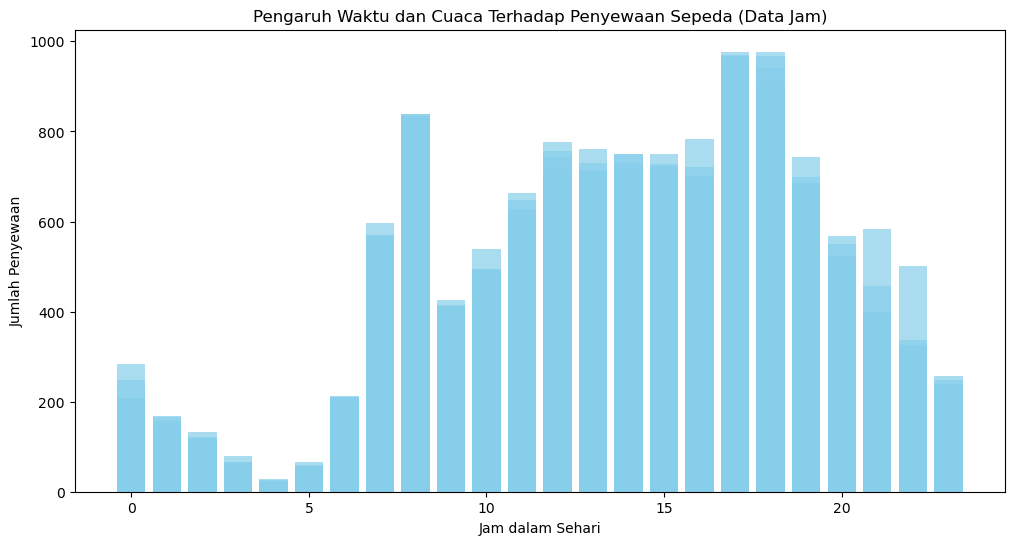

In [29]:
# Menggunakan bar chart untuk menampilkan pengaruh cuaca dan waktu terhadap penyewaan sepeda
hour_data = pd.read_csv('hour.csv')

plt.figure(figsize=(12, 6))
for weather in hour_data['weathersit'].unique():
    weather_data = hour_data[hour_data['weathersit'] == weather]
    plt.bar(weather_data['hr'], weather_data['cnt'], color='skyblue', alpha=0.7)

plt.title('Pengaruh Waktu dan Cuaca Terhadap Penyewaan Sepeda (Data Jam)')
plt.xlabel('Jam dalam Sehari')
plt.ylabel('Jumlah Penyewaan')
plt.show()


### Pertanyaan 2: Bagaimana distribusi penyewaan sepeda berdasarkan hari dalam seminggu?

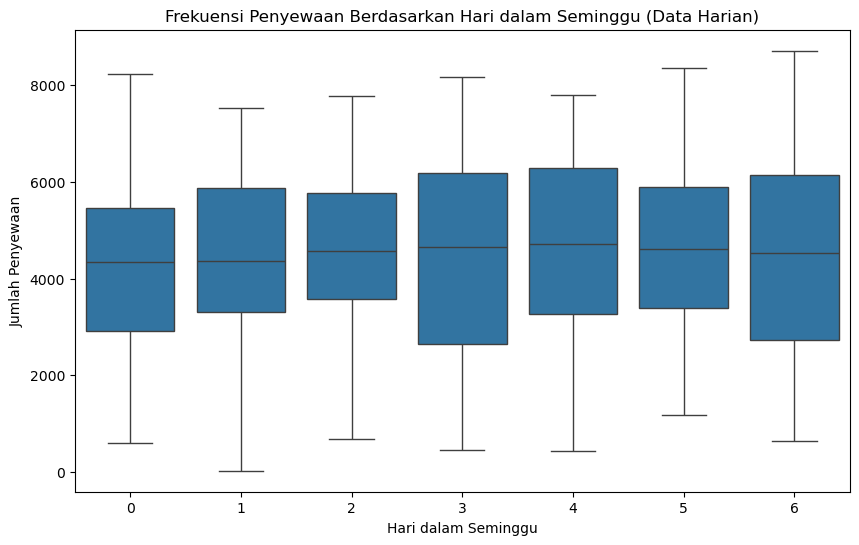

In [57]:
# Visualisasi karakteristik pengguna berdasarkan data harian
plt.figure(figsize=(10, 6)) 
sns.boxplot(data=day_data, x='weekday', y='cnt')
plt.title('Frekuensi Penyewaan Berdasarkan Hari dalam Seminggu (Data Harian)')
plt.xlabel('Hari dalam Seminggu') 
plt.ylabel('Jumlah Penyewaan')
plt.show()

**Insight:**
- Visualisasi pertama menunjukkan bahwa pola penyewaan sepeda sangat dipengaruhi oleh waktu dalam sehari dan kondisi cuaca. Terlihat adanya lonjakan signifikan pada jam-jam sibuk, seperti pagi dan sore hari, yang bertepatan dengan waktu berangkat dan pulang kerja. Selain itu, penyewaan cenderung menurun saat cuaca buruk, mengindikasikan pengaruh kuat faktor cuaca terhadap jumlah penyewaan.
- Visualisasi kedua menunjukkan bahwa frekuensi penyewaan berbeda tergantung pada hari dalam minggu.

## Analisis Lanjutan (Opsional)

## Conclusion

- Conclusion Pertanyaan 1 : Hasil analisis menunjukkan bahwa faktor cuaca dan waktu memiliki dampak yang signifikan terhadap jumlah penyewaan sepeda. Penyewaan cenderung meningkat pada waktu-waktu tertentu, seperti pagi dan sore hari, yang bertepatan dengan jam sibuk
- Conclusion Pertanyaan 2 : Hasil analisis menunjukkan bahwa distribusi penyewaan sepeda bervariasi berdasarkan hari dalam seminggu. Penyewaan cenderung lebih tinggi pada hari kerja, terutama pada pertengahan minggu (kamis dan jumat), dibandingkan dengan akhir pekan. Hal ini menunjukkan bahwa penggunaan sepeda mungkin lebih sering terkait dengan aktivitas harian seperti bekerja atau bersekolah. Pada akhir pekan, meskipun jumlah penyewaan masih ada, frekuensinya sedikit menurun.